2000
[[  1.         -18.17292628]
 [  1.         -27.05278863]
 [  1.          10.00336632]
 ...
 [  1.         -14.96480916]
 [  1.          -5.49892149]
 [  1.          13.55762568]]

Training With Alpha:0.01
Error after 0 iterations:0.19647505643365087
Error after 10000 iterations:0.018610516533828673
Error after 20000 iterations:0.018346205409444403
Error after 30000 iterations:0.018214815479211437
Error after 40000 iterations:0.018245896301941095
Error after 50000 iterations:0.018293787626737463
Error after 60000 iterations:0.018297695908522208
Error after 70000 iterations:0.01823726854590077
Error after 80000 iterations:0.018129716051887918
Error after 90000 iterations:0.018000005735754332
Error after 100000 iterations:0.017874428339641178
Error after 110000 iterations:0.017766528818139213
Error after 120000 iterations:0.017681808246598395
Error after 130000 iterations:0.01762941714599787
Error after 140000 iterations:0.01764730744942235
Error after 150000 iterations:0.0193629870

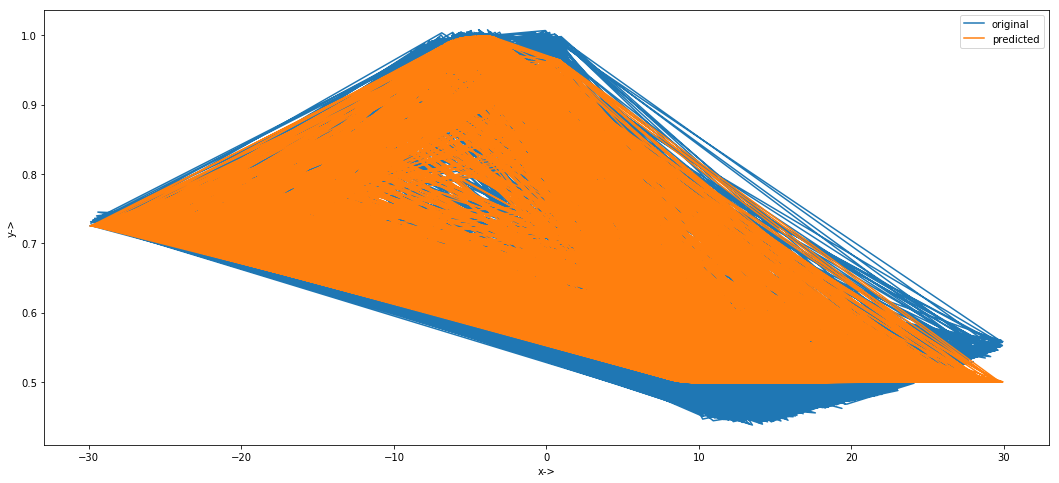

In [38]:
import numpy as np
import scipy.io as spio
import matplotlib.pyplot as plt
alpha = 0.01

# compute sigmoid nonlinearity
def sigmoid(x):
    output = 1/(1+np.exp(-x))
    return output

# convert output of sigmoid function to its derivative
def sigmoid_output_to_derivative(output):
    return output*(1-output)


mat = spio.loadmat('hw2data_2.mat', squeeze_me=True)    

print("Lifting the input space by 1")
X_1 = mat['X']
print(X_1.shape[0])
X= np.zeros([2000,2])
for i in range(len(X_1)):
    X[i,1]=X_1[i]
    X[i,0]=1

print(X)
                
y = mat['Y']

Y=np.zeros([2000,1])

for i in range(2000):
    Y[i,0]=y[i]
    
y=Y





print ("\nTraining With Alpha:" + str(alpha))
np.random.seed(1)

# randomly initialize our weights with mean 0
synapse_0 = 2*np.random.random((2,4)) - 1
synapse_1 = 2*np.random.random((4,1)) - 1

for j in range(200000):

    # Feed forward through layers 0, 1, and 2
    layer_0 = X
    layer_1 = sigmoid(np.dot(layer_0,synapse_0))
    layer_2 = sigmoid(np.dot(layer_1,synapse_1))
    

    # how much did we miss the target value?
    layer_2_error = layer_2 - y

    if (j% 10000) == 0:
        print ("Error after "+str(j)+" iterations:" + str(np.mean(np.abs(layer_2_error))))

    # in what direction is the target value?
    # were we really sure? if so, don't change too much
    layer_2_delta = layer_2_error*sigmoid_output_to_derivative(layer_2)
    

    # how much did each l1 value contribute to the l2 error (according to the weights)?
    layer_1_error = layer_2_delta.dot(synapse_1.T)

    # in what direction is the target l1?
    # were we really sure? if so, don't change too much.
    layer_1_delta = layer_1_error * sigmoid_output_to_derivative(layer_1)

    synapse_1 -= alpha * (layer_1.T.dot(layer_2_delta))
    synapse_0 -= alpha * (layer_0.T.dot(layer_1_delta))

    

layer_0 = X
print(synapse_0)
print(synapse_1)
layer_1 = sigmoid(np.dot(layer_0,synapse_0))
layer_2 = sigmoid(np.dot(layer_1,synapse_1))

plt.plot(X[:,1],y,label="original")
plt.plot(X[:,1],layer_2,label="predicted")
plt.xlabel("x->")
plt.ylabel("y->")
plt.gcf().set_size_inches(18,8)
plt.legend()


